In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
mnist= tf.keras.datasets.mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

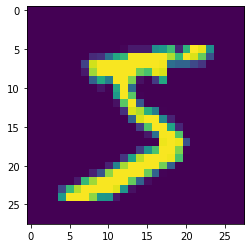

In [4]:
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_images[0])
print(train_labels[0])

In [5]:
train_images= train_images/255.0
test_images= test_images/255.0

In [6]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.998):
      print('\n Reached 60% accuracy so stopped training')
      self.model.stop_training=True

In [7]:
callbacks= mycallback()
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation= tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation= tf.nn.softmax)])

In [8]:
model.compile(optimizer= tf.optimizers.Adam(),loss= 'sparse_categorical_crossentropy',metrics= ['accuracy'])
history= model.fit(train_images,train_labels,epochs=10,callbacks= [callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9254
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1134 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0448 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0348 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0291 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0239 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016